In [1]:
from data_loader import SFTDataset
from matplotlib import pyplot as plt
from pathlib import Path
from transformers import AutoTokenizer
from torch.utils.data import DataLoader

In [2]:
tokenizer = AutoTokenizer.from_pretrained("../mini_tokenizer")
sft_data_path = "../data/sft_data/parquet/packed_sft_data.parquet"

dataset = SFTDataset(
    file_path=sft_data_path,
    max_seq_len=512
)

Loading data from parquet file: ../data/sft_data/parquet/packed_sft_data.parquet
Detected packed parquet file (with packing)


Loading packed parquet: 100%|██████████| 15900/15900 [00:16<00:00, 974.00it/s] 

-------------- sft dataset info --------------
file path   : ../data/sft_data/parquet/packed_sft_data.parquet
file size   : 24.58 MB
packing     : True
num samples : 15900
pad ratio   : 0.19%
----------------------------------------------


In [3]:
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)
for batch in dataloader:
    data = batch
    break

In [4]:
print(f"input_ids shape: {data["input_ids"].shape}")
print(f"labels shape: {data["labels"].shape}")
print(f"position_ids shape: {data["position_ids"].shape}")
print(f"attention_mask shape: {data["attention_mask"].shape}")

input_ids shape: torch.Size([2, 512])
labels shape: torch.Size([2, 512])
position_ids shape: torch.Size([2, 512])
attention_mask shape: torch.Size([2, 1, 512, 512])


In [5]:
id = 1
print("decoded input_ids:\n-----------------\n", tokenizer.decode(data["input_ids"][id].tolist()))

decoded input_ids:
-----------------
 <|im_start|>user
见た目でわかる、接客業において面倒くさい客の特徴を教えて下さい。<|im_end|>
<|im_start|>assistant
在接待客人的行业中，烦人的客人的特征因人而异，但有些共同之处。但是请注意，具有这些特征的人不一定都是令人讨厌的客人。以下是一些外观明显的特征：

1. 衣着和发型杂乱：这可能表明该人无法自我管理，可能会对服务有许多要求或在小事上过于挑剔。

2. 团体来店但与其他成员保持距离：在这种情况下，该人可能在团体中孤立或是领袖型人物，有可能提出让人头疼的要求。

3. 面带不悦：表现不悦的人可能对服务不满意。因此，在接待客人时要注意。

4. 嗓音大声，话语粗暴：声音大，话语粗鲁的人可能不考虑周围人的感受，可能提出许多要求。因此，在接待客人时需要小心处理。

5. 不放下手机或智能手机：此类人可能沉浸在自己的世界中，可能反应迟缓或提出模糊的要求。

关注这些特征，可以实现顺畅的应对。但请注意，不要仅仅依据外观判断客人，最重要的是要为每位客人提供周到、仔细的服务。<|im_end|>
<|im_start|>user
开始一个generation任务，让我们一起想想未来餐厅将会是什么样子。<|im_end|>
<|im_start|>assistant
好的！未来餐厅可能会使用智能菜单和自助点餐系统，顾客可以用手机或语音命令完成点餐，同时厨房会采用自动化机器人进行烹饪和配送。<|im_end|>
<|im_start|>user
那么餐厅内部的装修和风格呢？你觉得未来的餐厅会有哪些特点？<|im_end|>
<|im_start|>assistant
未来的餐厅可能会采用环保材料进行装修，设计会更加个性化和创意化，甚至有可能采用虚拟现实技术为顾客提供更加丰富的用餐体验。另外，未来的餐厅可能会强调健康和营养，使用更加天然、有机的食材。<|im_end|>
<|im_start|>user
非常有趣！那么现在来一个闭合式问答，告诉我世界上最高的山峰是什么？<|im_end|>
<|im_start|>assistant
 答案是珠穆朗玛峰，它位于喜马拉雅山脉，海拔8848米。<|im_end|>



input_ids:
-----------------
 [32000, 616, 356, 199, 1156, 17062, 254, 603, 17062, 101, 28334, 238, 17062, 234, 28334, 234, 282, 758, 1507, 25679, 17062, 105, 17062, 233, 17062, 227, 17062, 100, 484, 4398, 17062, 238, 17062, 244, 17062, 227, 1507, 17062, 107, 573, 338, 113, 28334, 241, 454, 17062, 231, 17062, 100, 543, 17062, 244, 17062, 227, 286, 32001, 199, 32000, 2570, 16415, 199, 306, 24992, 1507, 1236, 1751, 299, 270, 12488, 1236, 1507, 1236, 1699, 549, 318, 25630, 270, 744, 4435, 1425, 6691, 286, 1764, 1422, 2520, 270, 951, 1179, 1699, 2159, 15195, 2200, 7211, 1874, 11285, 259, 1507, 318, 286, 29871, 1514, 13063, 6175, 1699, 849, 199, 199, 17, 14, 221, 6114, 789, 297, 339, 674, 1613, 3506, 849, 29279, 2415, 934, 318, 2276, 2664, 713, 270, 4426, 366, 865, 13966, 1023, 17071, 751, 563, 421, 8124, 2452, 20625, 286, 199, 199, 18, 14, 221, 6057, 472, 5996, 744, 5923, 2984, 2266, 4148, 849, 11747, 270, 934, 318, 20179, 6057, 299, 11760, 8723, 12510, 674, 5272, 270, 5428, 1182, 10158, 1

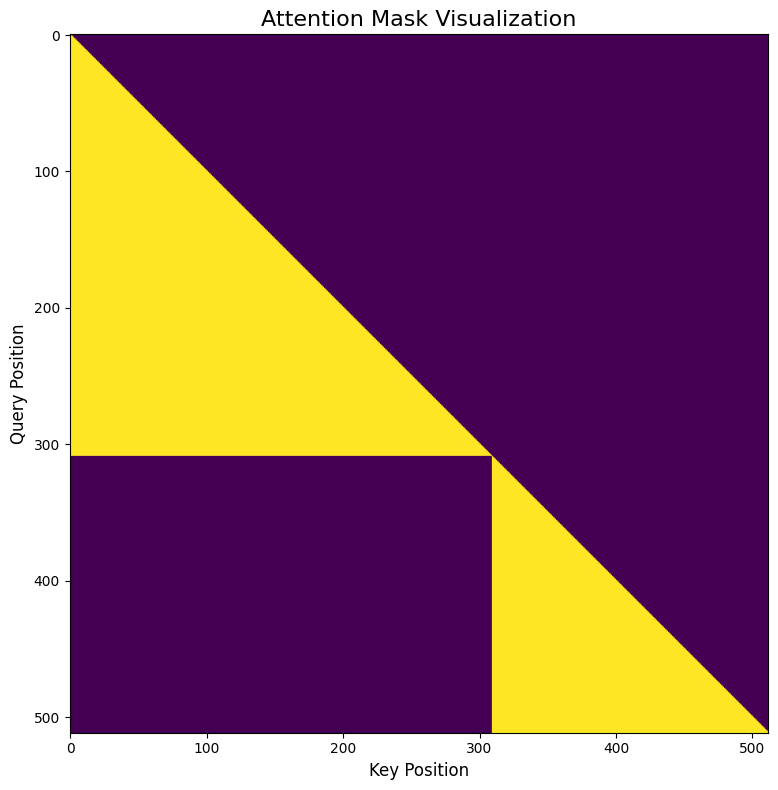

In [6]:
print(f"input_ids:\n-----------------\n", data["input_ids"][id].tolist())
print("labels:\n-----------------\n", data["labels"][id].tolist())
print("position_ids:\n-----------------\n", data["position_ids"][id].tolist())

plt.figure(figsize=(10, 8))
mask_data = data["attention_mask"][id][0].numpy()
im = plt.imshow(mask_data, cmap='viridis')
plt.title("Attention Mask Visualization", fontsize=16)
plt.xlabel('Key Position', fontsize=12)
plt.ylabel('Query Position', fontsize=12)
plt.grid(False)
plt.tight_layout()
plt.show()